Progetto: **Classificazione di testi descrittivi per destinazione d'uso, inerenti ai beni sottoposti ad aste giudiziarie italiane.**

Studente: **Alessandro Monolo** | *10439147*

Relatore: Marco Brambilla

Referente aziendale: Simone Redaelli

Master: Data Science & Artificial Intelligence

Università: Politecnico di Milano

<hr style="border:1px solid black">

## Trovo il numero minimo, massimo e distribuzione dei tokens derivanti dal modello XLM Roberta sulla variabile testuale preprocessata


<hr style="border:1px solid black">

**Importo le librerie che mi servono:**

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from matplotlib import cm
from PIL import Image
import string
import unicodedata
import time
import torch

In [2]:
# check if we have cuda installed
if torch.cuda.is_available():
    # to use GPU
    device = torch.device("cuda")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('GPU is:', torch.cuda.get_device_name(0))
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

No GPU available, using the CPU instead.


#### Set pandas options:

In [3]:
pd.set_option('display.max_colwidth', None)
pd.options.display.max_rows = 5000
pd.options.display.max_columns = 1000
pd.options.display.float_format = '{:.4f}'.format
pd.options.mode.chained_assignment = None

**Importo file CSV**

In [4]:
df = pd.read_csv("D:\\Master_Cefriel_DS_AI_Monolo\\0_Project_Work\\Dataset\\12_Dataset_XLM_RoBERTa_Model\\Dataset_XLM_RoBERTa_Model.csv")

In [5]:
from transformers import AutoTokenizer, XLMRobertaTokenizer, XLMRobertaForSequenceClassification, AdamW
import torch
from torch.utils.data import DataLoader, TensorDataset, RandomSampler, SequentialSampler

### Trovo il numero minimo, massimo e la relativa distribuzione dei tokens derivanti dal modello XLM RoBRTa

Token indices sequence length is longer than the specified maximum sequence length for this model (682 > 512). Running this sequence through the model will result in indexing errors


max number of tokens found:  746
min number of tokens found:  3


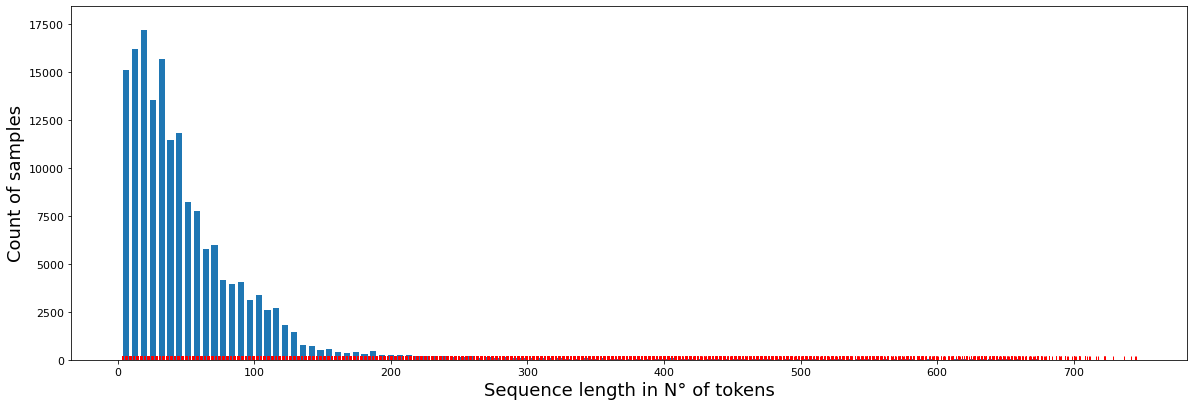

In [6]:
tokenizer = AutoTokenizer.from_pretrained('xlm-roberta-base')

text_descriptions = df["Descrizione_Bene_Pre_Process"].astype(str).tolist()


tokenized_feature_raw = tokenizer.batch_encode_plus(text_descriptions,
                                                    add_special_tokens=True)

token_sentence_length = [len(x) for x in tokenized_feature_raw['input_ids']]

print('max number of tokens found: ', max(token_sentence_length))
print('min number of tokens found: ', min(token_sentence_length))


plt.figure(figsize=(20, 6.5))
plt.hist(token_sentence_length, rwidth=0.7, bins=115)
sns.rugplot(token_sentence_length, color='r', height=0.01)
plt.xlabel('Sequence length in N° of tokens', fontsize=18)
plt.ylabel('Count of samples', fontsize=18)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()